<a href="https://colab.research.google.com/github/gr1nick/lab_bigData/blob/master/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0


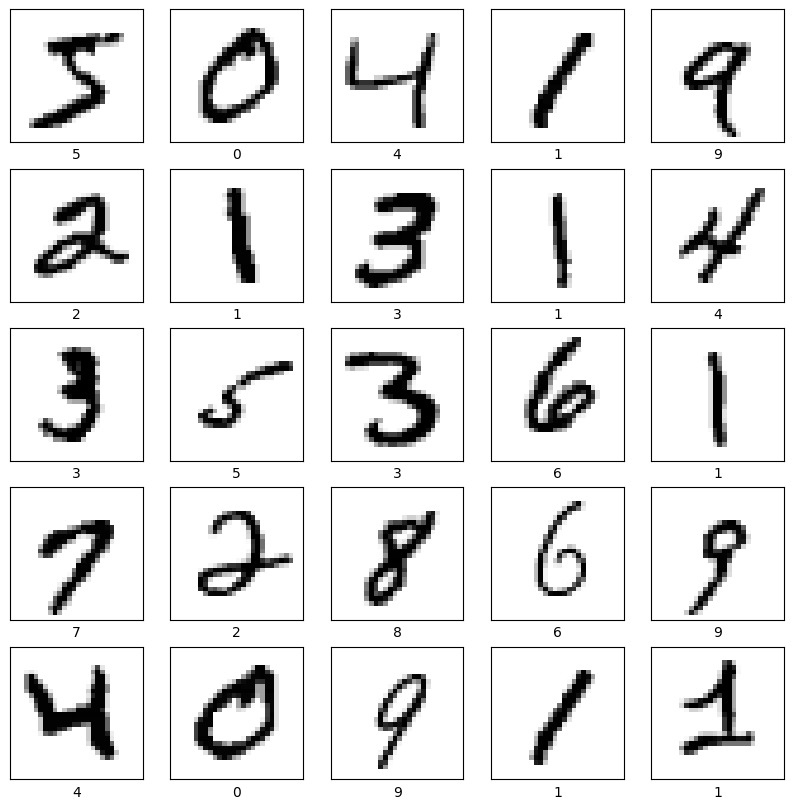

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [ ]:
# Шаг 1: Определение модели
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Преобразование из 2D в 1D
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Шаг 2: Компиляция модели
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Шаг 3: Обучение модели
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5955 - loss: 1.2822 - val_accuracy: 0.9006 - val_loss: 0.3596
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8988 - loss: 0.3569 - val_accuracy: 0.9188 - val_loss: 0.2831
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9196 - loss: 0.2857 - val_accuracy: 0.9263 - val_loss: 0.2580
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9283 - loss: 0.2521 - val_accuracy: 0.9335 - val_loss: 0.2356
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9340 - loss: 0.2307 - val_accuracy: 0.9363 - val_loss: 0.2227
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9398 - loss: 0.2120 - val_accuracy: 0.9400 - val_loss: 0.2058
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9449 - loss: 0.1968 - val_accuracy: 0.9414 - val_loss: 0.2051
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9493 - loss: 0.1778 - 

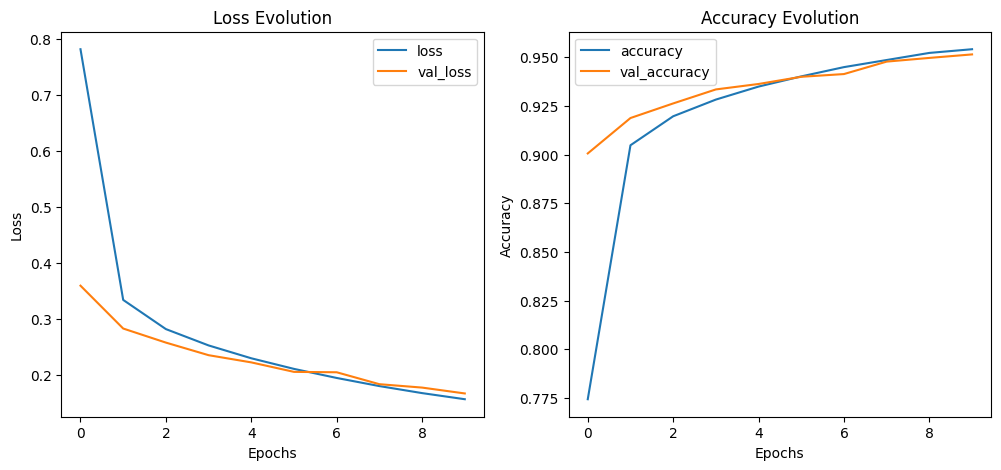

In [ ]:
plt.figure(figsize=(12, 5))

# Построение графика потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss Evolution')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Построение графика точности
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
model_sgd_momentum = tf.keras.models.clone_model(model)
model_sgd_momentum.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9),
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])
history_sgd_momentum = model_sgd_momentum.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8071 - loss: 0.6143 - val_accuracy: 0.9438 - val_loss: 0.1913
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9487 - loss: 0.1752 - val_accuracy: 0.9515 - val_loss: 0.1590
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9598 - loss: 0.1342 - val_accuracy: 0.9610 - val_loss: 0.1375
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9670 - loss: 0.1121 - val_accuracy: 0.9608 - val_loss: 0.1330
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9697 - loss: 0.0982 - val_accuracy: 0.9625 - val_loss: 0.1335
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9716 - loss: 0.0877 - val_accuracy: 0.9629 - val_loss: 0.1315
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9746 - loss: 0.0820 - val_accuracy: 0.9672 - val_loss: 0.1216
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9758 - loss: 0.0757 - 

In [ ]:
model_rmsprop = tf.keras.models.clone_model(model)
model_rmsprop.compile(optimizer='rmsprop',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8085 - loss: 0.6439 - val_accuracy: 0.9350 - val_loss: 0.2188
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9402 - loss: 0.2049 - val_accuracy: 0.9478 - val_loss: 0.1801
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9517 - loss: 0.1611 - val_accuracy: 0.9544 - val_loss: 0.1585
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9605 - loss: 0.1351 - val_accuracy: 0.9579 - val_loss: 0.1438
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9655 - loss: 0.1163 - val_accuracy: 0.9557 - val_loss: 0.1552
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9660 - loss: 0.1164 - val_accuracy: 0.9590 - val_loss: 0.1423
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9700 - loss: 0.1026 - val_accuracy: 0.9635 - val_loss: 0.1373
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9724 - loss: 0.0952 - 

In [ ]:
model_adam = tf.keras.models.clone_model(model)
model_adam.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
history_adam = model_adam.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8033 - loss: 0.6724 - val_accuracy: 0.9408 - val_loss: 0.2008
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9437 - loss: 0.1924 - val_accuracy: 0.9478 - val_loss: 0.1746
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9574 - loss: 0.1424 - val_accuracy: 0.9538 - val_loss: 0.1522
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9634 - loss: 0.1207 - val_accuracy: 0.9613 - val_loss: 0.1266
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9703 - loss: 0.0995 - val_accuracy: 0.9621 - val_loss: 0.1238
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9718 - loss: 0.0923 - val_accuracy: 0.9644 - val_loss: 0.1216
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9741 - loss: 0.0815 - val_accuracy: 0.9635 - val_loss: 0.1240
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9765 - loss: 0.0738 - 

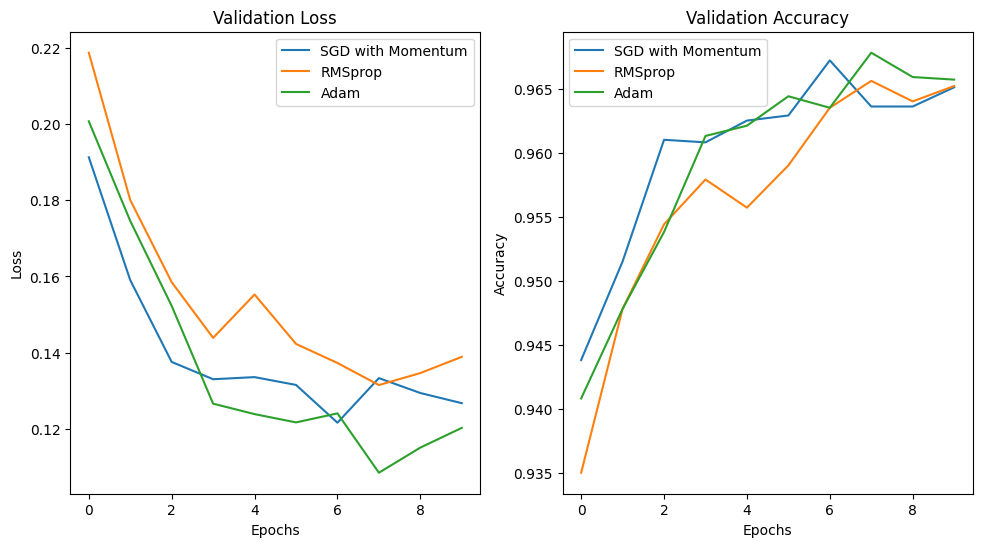

In [ ]:
plt.figure(figsize=(18, 6))

# Сравнение потерь
plt.subplot(1, 3, 1)
plt.plot(history_sgd_momentum.history['val_loss'], label='SGD with Momentum')
plt.plot(history_rmsprop.history['val_loss'], label='RMSprop')
plt.plot(history_adam.history['val_loss'], label='Adam')
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Сравнение точности
plt.subplot(1, 3, 2)
plt.plot(history_sgd_momentum.history['val_accuracy'], label='SGD with Momentum')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop')
plt.plot(history_adam.history['val_accuracy'], label='Adam')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Обучение свёрточной нейронной сети (CNN)

In [ ]:
# Импортируем необходимые модули
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Построение модели
cnn_model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Компиляция модели
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Обучение модели
cnn_history = cnn_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.9036 - loss: 0.3124 - val_accuracy: 0.9762 - val_loss: 0.0732
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 31ms/step - accuracy: 0.9837 - loss: 0.0508 - val_accuracy: 0.9865 - val_loss: 0.0377
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9900 - loss: 0.0319 - val_accuracy: 0.9901 - val_loss: 0.0316
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9929 - loss: 0.0231 - val_accuracy: 0.9895 - val_loss: 0.0339
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9958 - loss: 0.0134 - val_accuracy: 0.9903 - val_loss: 0.0295
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9963 - loss: 0.0124 - val_accuracy: 0.9903 - val_loss: 0.0325
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9971 - loss: 0.0082 - val_accuracy: 0.9910 - val_loss: 0.0333
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9970 -

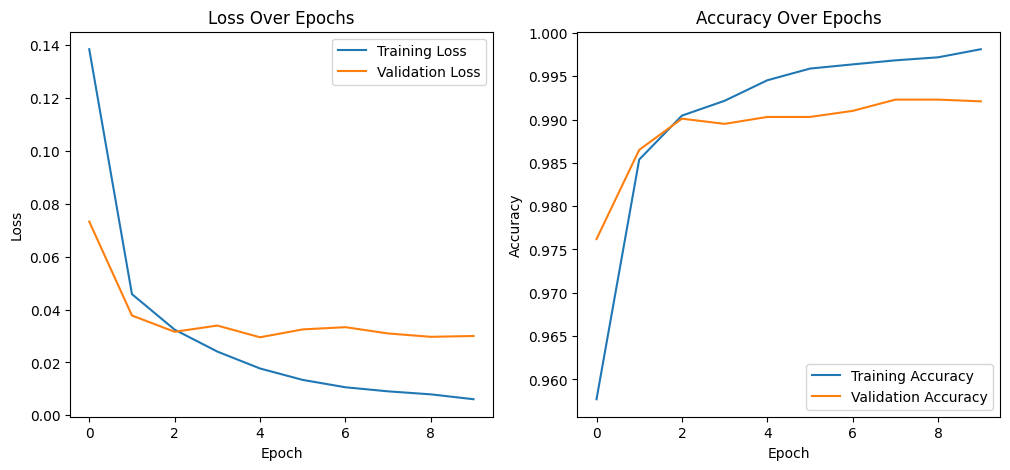

In [ ]:
# Построение графиков
plt.figure(figsize=(12, 5))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# График точности
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
# Компиляция модели с оптимизатором Adagrad
cnn_model_adagrad = tf.keras.models.clone_model(cnn_model)
cnn_model_adagrad.compile(optimizer='adagrad',
                          loss='sparse_categorical_crossentropy',
                          metrics=['accuracy'])

# Обучение модели
history_adagrad = cnn_model_adagrad.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.4870 - loss: 1.8687 - val_accuracy: 0.8681 - val_loss: 0.5023
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.8718 - loss: 0.4587 - val_accuracy: 0.9069 - val_loss: 0.3314
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9044 - loss: 0.3372 - val_accuracy: 0.9223 - val_loss: 0.2744
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9188 - loss: 0.2800 - val_accuracy: 0.9318 - val_loss: 0.2400
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.9269 - loss: 0.2505 - val_accuracy: 0.9374 - val_loss: 0.2159
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9329 - loss: 0.2288 - val_accuracy: 0.9429 - val_loss: 0.1976
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9385 - loss: 0.2085 - val_accuracy: 0.9474 - val_loss: 0.1831
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9430 -

In [ ]:
# Компиляция модели с оптимизатором Nadam
cnn_model_nadam = tf.keras.models.clone_model(cnn_model)
cnn_model_nadam.compile(optimizer='nadam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Обучение модели
history_nadam = cnn_model_nadam.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.9058 - loss: 0.3181 - val_accuracy: 0.9855 - val_loss: 0.0434
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.9845 - loss: 0.0504 - val_accuracy: 0.9848 - val_loss: 0.0469
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9903 - loss: 0.0330 - val_accuracy: 0.9902 - val_loss: 0.0320
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9887 - val_loss: 0.0316
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9908 - val_loss: 0.0300
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 60s 32ms/step - accuracy: 0.9958 - loss: 0.0131 - val_accuracy: 0.9906 - val_loss: 0.0298
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9967 - loss: 0.0105 - val_accuracy: 0.9913 - val_loss: 0.0317
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9971 -